### 1. 파일 불러오기

In [1]:
import pandas as pd

train_data = pd.read_csv('c:/프로젝트/Hotel Review/Data/review_jeju50_train_0601.csv',encoding='ms949')
test_data = pd.read_csv('c:/프로젝트/Hotel Review/Data/review_jeju50_test_0601.csv',encoding='ms949')
tag_data = pd.read_csv('c:/프로젝트/Hotel Review/Data/review_jeju50_0601_F_1.csv',encoding='ms949')

In [2]:
len(train_data)

20000

In [3]:
train_data[:3] 

,name,title,score,label,review
0,랜딩관 제주신화월드 호텔앤리조트,3603,8.0,0,시설도 깨끗하고 객실 뷰도 좋았어요!!! 수영장도 시설이 너무 좋았어요. 주차시설이...
1,메리어트관 제주신화월드 호텔앤리조트,3603,8.0,0,시설도 깨끗하고 객실 뷰도 좋았어요!!! 수영장도 시설이 너무 좋았어요. 주차시설이...
2,랜딩관 제주신화월드 호텔앤리조트,1051745507,8.0,0,돌담집을 제외한 다른 모든 면에서 만족스러운 호텔이었음(돌담집에서 고객을 응대하는 ...


In [4]:
len(test_data)

10000

In [5]:
test_data[:3]

,name,title,score,label,review
0,호텔 샬롬 제주,매우 좋음,8.0,0,제주 시내에 위치하여 걸어서 주변 시내를 돌아다닐 수 있습니다 식당도 많고 산책겸 ...
1,아스타 호텔,매우 좋음,8.0,0,제주 시내에 위치한 가성비 호텔
2,신라스테이 제주,매우 좋음,8.0,0,제주 시내에 있어 접근성이 좋습니다. 렌트카로 갔지만 대중교통이나 택시를 이용해서도...


<Axes: >

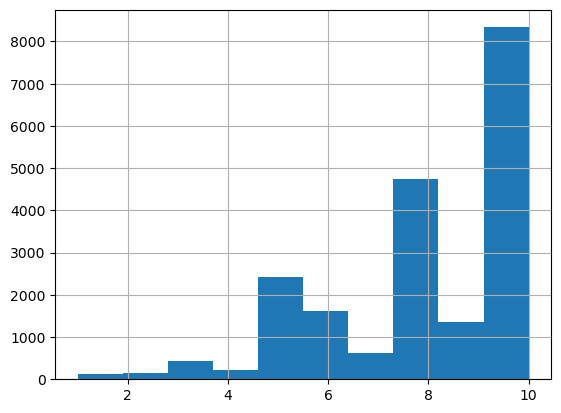

In [6]:
train_data['score'].hist()

<Axes: >

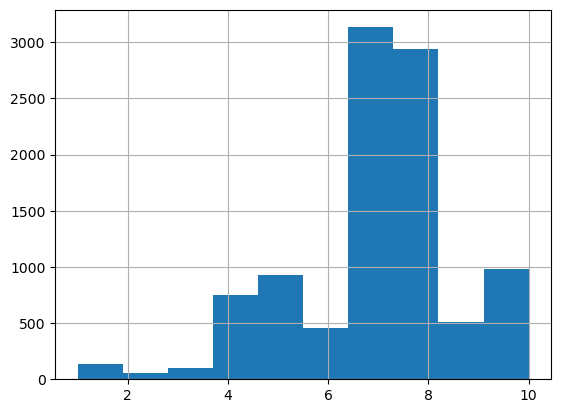

In [7]:
test_data['score'].hist()

### 2. 전처리

In [8]:
train_data['review'].nunique(),train_data['label'].nunique()

(17781, 2)

In [9]:
#중복값 제거
train_data.drop_duplicates(subset=['review'],inplace=True)
len(train_data)

17781

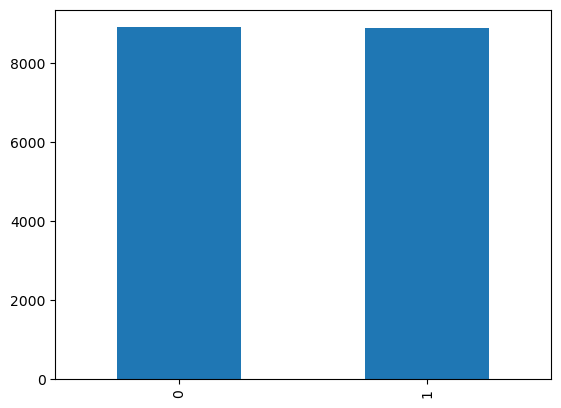

In [10]:
import matplotlib.pyplot as plt
train_data['label'].value_counts().plot(kind = 'bar')
plt.show()

In [11]:
train_data.loc[train_data.review.isnull()]

,name,title,score,label,review


In [12]:
#특수문자,기호 제거
train_data['review'] =train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 A-Za-z]","")
train_data['review'] =train_data['review'].str.replace('[.,!?"\':;~()]','')
train_data[:3]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14056\2866373672.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] =train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 A-Za-z]","")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14056\2866373672.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] =train_data['review'].str.replace('[.,!?"\':;~()]','')


,name,title,score,label,review
0,랜딩관 제주신화월드 호텔앤리조트,3603,8.0,0,시설도 깨끗하고 객실 뷰도 좋았어요 수영장도 시설이 너무 좋았어요 주차시설이 너무 ...
2,랜딩관 제주신화월드 호텔앤리조트,1051745507,8.0,0,돌담집을 제외한 다른 모든 면에서 만족스러운 호텔이었음돌담집에서 고객을 응대하는 방...
5,히든 클리프 호텔&네이쳐,-,3.0,0,아침식사와 직원분들은 친절하셨습니다


In [13]:
import numpy as np
#공백 제거
train_data['review'] =train_data['review'].str.replace('^ +', "")
train_data['review'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14056\298783350.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] =train_data['review'].str.replace('^ +', "")


name       0
title      0
score      0
label      0
review    56
dtype: int64

In [14]:
train_data.loc[train_data.review.isnull()][:3]

,name,title,score,label,review
1435,롯데 호텔 제주,家族でも、友達とでも,6.0,0,NaN
1546,롯데 호텔 제주,家族連れにはぴったり,8.0,0,NaN
1895,더 베스트 제주 성산,价格?惠，但房??小，??人住有点??。,5.0,0,NaN


In [15]:
train_data = train_data.dropna(how = 'any')
len(train_data)

17725

In [16]:
# test_data에도 동일한 과정 적용
test_data.drop_duplicates(subset = ['review'],inplace=True)


In [17]:
test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['review'] =test_data['review'].str.replace('[.,!?"\':;~()]','')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14056\833855062.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14056\833855062.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['review'] =test_data['review'].str.replace('[.,!?"\':;~()]','')


In [18]:
test_data['review'] =train_data['review'].str.replace('^ +', "")

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14056\2836428721.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['review'] =train_data['review'].str.replace('^ +', "")


In [19]:
test_data['review'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
len(test_data)

7933

### 3. 한글 형태소 분석 및 토큰화

In [20]:
stopwords =['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']

In [21]:
# 형태소
from konlpy.tag import Okt
from collections import Counter
okt = Okt()
X_train = []
for sentence in train_data['review']: 
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_train.append(temp_X)

In [22]:
print(X_train[:3])

[['시설', '깨끗하다', '객실', '뷰', '좋다', '수영장', '시설', '너무', '좋다', '주차', '시설', '너무', '좋다', '또', '오다', '싶다', '애', '방학', '을', '맞이', '오다', '담', '또', '오다', '싶다'], ['돌담', '집', '을', '제외', '다른', '모든', '면', '에서', '만족스럽다', '이다', '돌담', '집', '에서', '고객', '을', '응대', '방법', '일반', '여관', '이하', '수준', '이다'], ['아침식사', '직원', '분들', '친절하다']]


In [23]:
# 테스트 데이터에 대한 토큰화
X_test = []
for sentence in test_data['review']:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in
    stopwords]
    X_test.append(temp_X)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [25]:
print(tokenizer.word_index)

{'좋다': 1, '있다': 2, '너무': 3, '을': 4, '이다': 5, '없다': 6, '위치': 7, '직원': 8, '에서': 9, '시설': 10, '친절하다': 11, '조식': 12, '않다': 13, '객실': 14, '이용': 15, '로': 16, '깨끗하다': 17, '같다': 18, '되다': 19, '아쉽다': 20, '자다': 21, '오다': 22, '보다': 23, '가격': 24, '수영장': 25, '다': 26, '것': 27, '뷰': 28, '비': 29, '수': 30, '가족': 31, '넓다': 32, '가다': 33, '되어다': 34, '가성': 35, '많다': 36, '가깝다': 37, '곳': 38, '인': 39, '적': 40, '침대': 41, '편하다': 42, '분들': 43, '룸': 44, '안': 45, '조금': 46, '깔끔하다': 47, '방': 48, '때': 49, '주차': 50, '매우': 51, '하고': 52, '아이': 53, '해주다': 54, '고': 55, '정말': 56, '분': 57, '점': 58, '불편하다': 59, '주변': 60, '이라': 61, '더': 62, '공항': 63, '생각': 64, '방문': 65, '다음': 66, '만': 67, '주차장': 68, '먹다': 69, '서비스': 70, '까지': 71, '최고': 72, '맛있다': 73, '요': 74, '층': 75, '들다': 76, '등': 77, '화장실': 78, '만족하다': 79, '또': 80, '싶다': 81, '아주': 82, '바다': 83, '괜찮다': 84, '모두': 85, '아니다': 86, '바로': 87, '못': 88, '정도': 89, '청소': 90, '편안하다': 91, '나': 92, '많이': 93, '신화': 94, '대비': 95, '시간': 96, '그리고': 97, '안되다': 98, '크다': 99, '체크': 100, '에도': 

In [26]:
# 출현빈도가 3회 미만인 단어들
threshold = 3
total_cnt = len(tokenizer.word_index) 
rare_cnt = 0
total_freq = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print(total_cnt)
print(rare_cnt)

11785
6473


In [27]:
vocab_size = total_cnt -rare_cnt + 1
print(vocab_size)

5313


In [28]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [29]:
import joblib
joblib.dump(tokenizer, 'RNN_11tokenizer.h5')

['RNN_11tokenizer.h5']

In [30]:
print(X_train[:3])

[[10, 17, 14, 28, 1, 25, 10, 3, 1, 50, 10, 3, 1, 80, 22, 81, 434, 3556, 4, 1030, 22, 749, 80, 22, 81], [3557, 341, 4, 1192, 110, 141, 154, 9, 105, 5, 3557, 341, 9, 554, 4, 263, 2017, 844, 3558, 1567, 457, 5], [259, 8, 43, 11]]


In [31]:
y_train = np.array(train_data['label'][:])
y_test = np.array(test_data['label'][:])

In [32]:
max_len = max(len(l) for l in X_train)

In [33]:
cnt = 0
for s in X_train:
    if(len(s) <= 30):
        cnt = cnt + 1
(cnt / len(X_train))*100

82.73060648801128

### 4. 모델 학습 / 성능 평가 / 예측정확도 

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [35]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer='rmsprop',
loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         1062600   
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,231,177
Trainable params: 1,231,177
Non-trainable params: 0
_________________________________________________________________


In [36]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
mc = ModelCheckpoint('RNN_11model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size = 64, epochs=10,validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
221/222 [============================>.] - ETA: 0s - loss: 0.6308 - acc: 0.6524
Epoch 1: val_acc improved from -inf to 0.35289, saving model to RNN_11model.h5
222/222 [==============================] - 17s 62ms/step - loss: 0.6307 - acc: 0.6525 - val_loss: 1.0091 - val_acc: 0.3529
Epoch 2/10
221/222 [============================>.] - ETA: 0s - loss: 0.5677 - acc: 0.7009
Epoch 2: val_acc improved from 0.35289 to 0.40339, saving model to RNN_11model.h5
222/222 [==============================] - 13s 60ms/step - loss: 0.5678 - acc: 0.7008 - val_loss: 0.9324 - val_acc: 0.4034
Epoch 3/10
221/222 [============================>.] - ETA: 0s - loss: 0.5267 - acc: 0.7330
Epoch 3: val_acc did not improve from 0.40339
222/222 [==============================] - 13s 60ms/step - loss: 0.5267 - acc: 0.7331 - val_loss: 1.2406 - val_acc: 0.3109
Epoch 4/10
221/222 [============================>.] - ETA: 0s - loss: 0.4918 - acc: 0.7584
Epoch 4: val_acc improved from 0.40339 to 0.55515, saving mo

In [37]:
loaded_model = load_model('RNN_11model.h5')
loaded_model.evaluate(X_test, y_test)

248/248 [==============================] - 4s 14ms/step - loss: 0.9290 - acc: 0.4997


[0.9290133118629456, 0.4996848702430725]

### 5. Revies 예측

In [39]:
import math
def review_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) #정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if( score < 0.1): 
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 매우 부정 리뷰입니다.\n")
    elif( score >= 0.1 and score < 0.2): 
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 매우 부정 리뷰입니다.\n")
    elif(score >= 0.2 and score < 0.3):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 부정 리뷰입니다.\n")
    elif(score >= 0.3 and score < 0.4):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 부정 리뷰입니다.\n")
    elif(score >= 0.4 and score < 0.5):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 부정 리뷰입니다.\n")
    elif(score >= 0.5 and score < 0.6):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 보통 리뷰입니다.\n")
    elif(score >= 0.6 and score < 0.7):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 보통 리뷰입니다.\n")
    elif(score >= 0.7 and score < 0.8):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 긍정 리뷰입니다.\n")
    elif(score >= 0.8 and score <= 0.9):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 긍정 리뷰입니다.\n")
    elif(score > 0.9 and score <= 1.0):
        print(f"예상 평점 {math.trunc(score* 10)}점 -> 매우 긍정 리뷰입니다.\n")
    # else:
    #     print(f"예상 평점 {math.trunc(score* 10)}점 -> 긍정 리뷰입니다.~\n")
    #print(score)

In [40]:
review_predict('공간이 넓어서 셋이 지내기도 불편하지 않았다')

1/1 [==============================] - 0s 351ms/step
예상 평점 5점 -> 보통 리뷰입니다.



In [41]:
review_predict('2박동안 조식메뉴가 똑같았다는게 조금 아쉽습니다')

1/1 [==============================] - 0s 24ms/step
예상 평점 2점 -> 부정 리뷰입니다.



In [42]:
review_predict('1층이 좀 답답하게 느껴졌음')

1/1 [==============================] - 0s 23ms/step
예상 평점 1점 -> 매우 부정 리뷰입니다.



In [43]:
review_predict('공간이 좁아서 혼자 지내기도 불편했다')

1/1 [==============================] - 0s 24ms/step
예상 평점 3점 -> 부정 리뷰입니다.



In [44]:
review_predict('공간은 좁지만 혼자 지내기 충분했다')

1/1 [==============================] - 0s 26ms/step
예상 평점 4점 -> 부정 리뷰입니다.



In [45]:
review_predict('수영장이 좋고 단지내에 할 수 있는 것이 많았다')

1/1 [==============================] - 0s 112ms/step
예상 평점 6점 -> 보통 리뷰입니다.



In [46]:
review_predict('신회월드는 숙소도 좋지만 식당가가 훌륭합니다.한식당 선은 매우 훌륭한데. 육전 강추입니다.')

1/1 [==============================] - 0s 30ms/step
예상 평점 6점 -> 보통 리뷰입니다.



In [47]:
review_predict('잘 선택했다는 좋은 하루였습니다')

1/1 [==============================] - 0s 21ms/step
예상 평점 2점 -> 부정 리뷰입니다.



In [48]:
review_predict('해외나가지 않아도 호텔안에만 있으니 해외 간 느낌이 들고 시설이 좋아서 편안')

1/1 [==============================] - 0s 25ms/step
예상 평점 4점 -> 부정 리뷰입니다.



In [49]:
review_predict('사이트와 다르게 조식은 제공 되지 않습니다. 해당 사항을 사전에 고지해주지 않습니다.')

1/1 [==============================] - 0s 24ms/step
예상 평점 1점 -> 매우 부정 리뷰입니다.



In [50]:
review_predict('청소가 아쉽습니다. 객실 및 침구 청소는 하시는데 화장실 및 욕조 청소는 안 되어있더라구요.')

1/1 [==============================] - 0s 25ms/step
예상 평점 0점 -> 매우 부정 리뷰입니다.



In [51]:
review_predict('직원들의 서비스, 주방장님의 정갈한 음식. 분위기도 조용하고.퀄러티는 초특급 5급인데요.')

1/1 [==============================] - 0s 35ms/step
예상 평점 2점 -> 부정 리뷰입니다.



In [55]:
review_predict('아주 깨끗하고 청결하며 주인장이 너무 너무 친절함')

1/1 [==============================] - 0s 225ms/step
예상 평점 9점 -> 매우 긍정 리뷰입니다.



### 6. Wordclaud

In [52]:
tag_data.drop_duplicates(subset=['review'],inplace=True)
tag_review = [review for review in tag_data['review'] if type(review) is str]
counts = Counter(tag_review)
tags=counts.most_common(20) 
tags

[('시설도 깨끗하고 객실 뷰도 좋았어요!!! 수영장도 시설이 너무 좋았어요. 주차시설이 너무 좋았어요. 또 오고 싶네요. 애들 방학을 맞이하여 왔는데 담에 또 오고 싶네요...',
  1),
 ('돌담집을 제외한 다른 모든 면에서 만족스러운 호텔이었음(돌담집에서 고객을 응대하는 방법은 일반 여관이하의 수준이었음)', 1),
 ('아침식사와 직원분들은 친절하셨습니다.', 1),
 ('침대  윗쪽과 침대 옆 조명 윗쪽에 먼지가 많이 쌓여있었고 침대 옆쪽 콘센트가 고장 나서 휴대폰 충전을 하지 못했습니다. 그리고 저희 방쪽이 라운지때문인지 무엇 때문인지는 모르겠지만  밤에 쿵쿵 거리는 소리가 너무 심했습니다. 그리고 나이트 가운 끈쪽이 오염이 되어 있었습니다. 결론적으로 제가 예약 할때 청결 부분에 신경 많이 쓴다고 요청까지 하였는데 ...',
  1),
 ('어른5명 아이2명 방문했어요방도 세칸이고 방마다 침대가 있네요청소상태도 깨끗하고 넓어서 아이들과 지내기에 좋았어요', 1),
 ('방키를 하나 밖에 받지 못해서 불편했습니다.\r\nSUV를 주차하기에 호텔 주차장 이용에 제한이 있어서 불편했습니다.\r\n주변 공용주차장을 이용했어요. \r\n발매트가 따로 있었으면 좋을 것 같습니다.',
  1),
 ('위치가 매일올레시장과 이중섭 거리, 해변과 가까워 걸어다니기에 안성맞춤이었습니다.\r\n5박 6일 동안 매일 방정리를 해 주시고, 3일째 침대보도 갈아 주셔서 보송보송하게 잘 지냈습니다.\r\n청소하시는 분들 수고 많으셨습니다.',
  1),
 ('뷰가 조금 아쉬웠습지요. 바다가 어설프게 보여서 감질맛이 났습니다.', 1),
 ('월드컵경기장 근처  위치 좋구요, 수영장 이용 할 수 있어서 좋았습니다.', 1),
 ('(구?)시가지의 중심에 위치하여 주변이 쾌적하지는 않지만 별로 불편하지도 않았슴', 1),
 ('(프리미어)방이 매우 넓어서 쾌적하였슴.  청소 상태 매우 좋았슴.  주차 공간도 비교적 여유 있었슴.\r\n배를 타는 제주 여객선터미널이 가까워서 

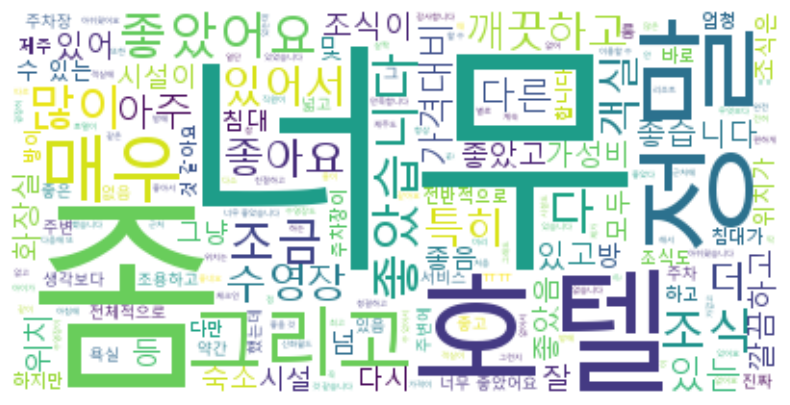

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

wc = WordCloud('c:/Windows/Fonts/malgun.ttf',background_color='white').generate(' '.join(tag_review))

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
